# Direction Tuning and Optimization Angles for Neuronal Firing Rates
John Ta

## Initializer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sci
import scipy as sci
from scipy.io import loadmat
import pandas as pd
import math

from scipy import optimize

### Data Imports

In [2]:
data = loadmat("HW5_data.mat")

In [3]:
dataTemp = data["cellArrayOfCells"]                                            #5 individual MT cells

In [4]:
df = pd.DataFrame(dataTemp, index = ["MT 1", "MT 2", "MT 3", "MT 4", "MT 5"])  #creating dataframe with pandas
df = df.rename(columns={0:"Col 1", 1: "Col 2"})

In [5]:
ecodes_columns = ["dot_on","dot_off","dot_dir","dot_coh","task","correct"]
ecodes_data = pd.DataFrame(df["Col 1"]["MT 1"]['ecodes'][0][0][0]['data'][0],columns=ecodes_columns) #col 1

In [6]:
spikeTimes = pd.DataFrame(df["Col 1"]["MT 1"]['spikes'][0][0][0][0],columns=["Spike Times"])

## Problem 1: Direction Tuning

### Part (a): Polar plotting

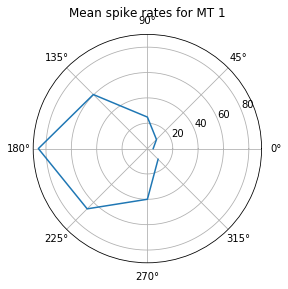

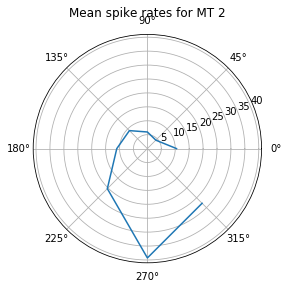

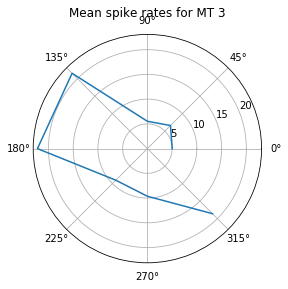

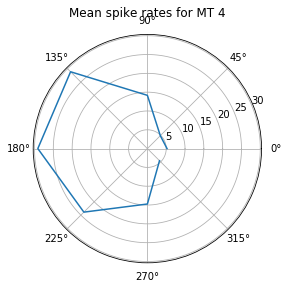

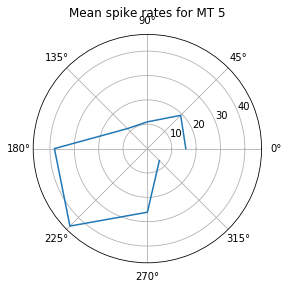

<Figure size 432x288 with 0 Axes>

In [7]:
"""
Nested for loop that goes through each MT cell data.

Nested for loop bins the spike data based on the provided start and end time.
Spike data is averaged out alongside corresponding angle orientation.
"""

finalAngles = [[]]*5 #angles data stored for later use, [degrees]
finalSpikeCounts = [[]]*5 #spike counts data stored for later use [s]

for MTcell, i in zip(["MT 1", "MT 2", "MT 3", "MT 4", "MT 5"],range(5)):
    directions = [] #empty list to store angle of orientation
    spikeCounts = [] #empty list to store spikes
    
    ecodes_data = pd.DataFrame(df["Col 1"][MTcell]['ecodes'][0][0][0]['data'][0],columns=ecodes_columns)
    startTimes = ecodes_data["dot_on"]*(1/1000) #onset time of motion stimulus, scaled to [s]
    endTimes = ecodes_data["dot_off"]*(1/1000) #offset time of motion stimulus, scaled to [s]
    
    for startTime, endTime, n in zip(startTimes, endTimes, range(len(startTimes))):
        temp = pd.DataFrame(df["Col 1"][MTcell]['spikes'][0][0][n][0],columns=["Spike Times"])*1/1000 #spike times, scaled to [s]

        binz = [startTime,endTime] #bin comprised of onset and offset times
        viewingTime = endTime-startTime #total viewing time

        a,b = np.histogram(temp['Spike Times'],bins=binz);
        
        direction = ecodes_data["dot_dir"][n]

        directions.append(direction)
        spikeCounts.append(a[0]/viewingTime) #spike counts normalized by bin width, viewing time

    countsdf = pd.DataFrame({"Spikes" : spikeCounts, 
                             "Angle" : directions})

    sorteddata = countsdf.sort_values(by = ["Angle"], ascending = True).groupby("Angle").mean().reset_index() #averaging by angle
    
    finalAngles[i] = sorteddata["Angle"] #storing for later use
    finalSpikeCounts[i] = sorteddata["Spikes"] #storing for later use
    
    plt.polar(sorteddata["Angle"]*np.pi/180,sorteddata["Spikes"])
    plt.tight_layout()
    plt.title("Mean spike rates for " + MTcell)
    plt.figure();

### Part (b): von Mises fit

In [8]:
"""
von Mises function
"""
def vonMises(theta,A,phi,k): #parameters: theta angle; A = value of fcn at preferred orientation phi; k = width
    return A*np.exp(k*(np.cos(theta-phi)-1))

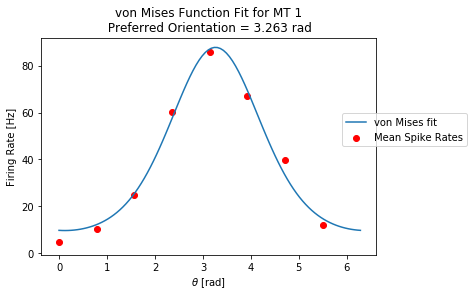

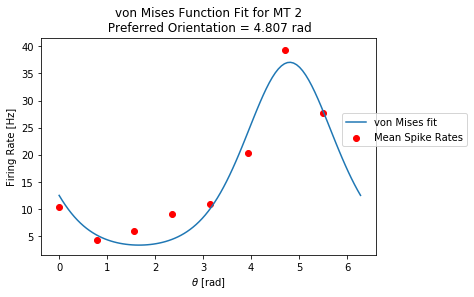

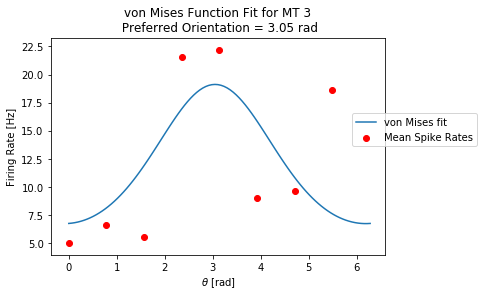

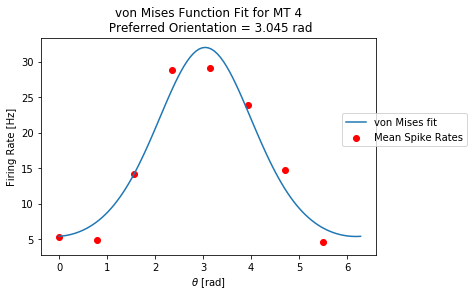

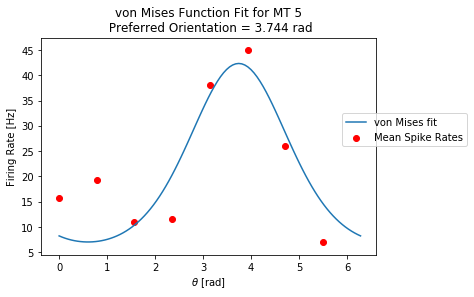

<Figure size 432x288 with 0 Axes>

In [9]:
preferredDir = [] #stores preferred orientation of the cells
phiGuesses = [3, 5, 3, 3, 4]

for angles, sortedspikes, guess, title in zip(finalAngles, finalSpikeCounts, phiGuesses, ["MT 1", "MT 2", "MT 3", "MT 4", "MT 5"]):
    angles = angles*np.pi/180 #converting degrees to rad
    
    params, params_covariance = optimize.curve_fit(vonMises,angles,sortedspikes,p0 = [max(sortedspikes),guess,20])
    
    thetas = np.linspace(0,2*np.pi,100)
    
    plt.plot(thetas, vonMises(thetas,params[0],params[1],params[2]),label="von Mises fit")
    plt.scatter(angles,sortedspikes,label="Mean Spike Rates",color="red")
    plt.xlabel(r"$\theta$ [rad]")
    plt.ylabel("Firing Rate [Hz]")
    plt.title("von Mises Function Fit for " + title + "\n Preferred Orientation = " + str(round(params[1],3)) + " rad")
    plt.legend(loc=(0.9,0.5));
    plt.figure();

### Part (c) Extra Credit

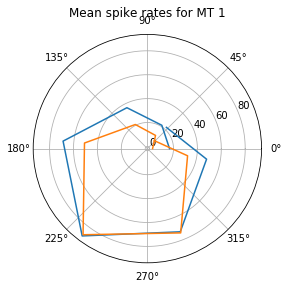

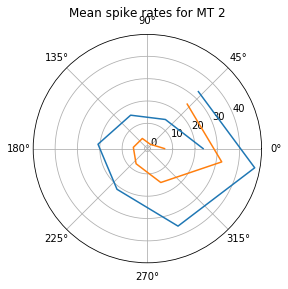

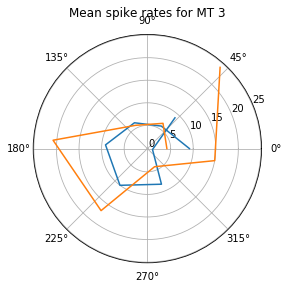

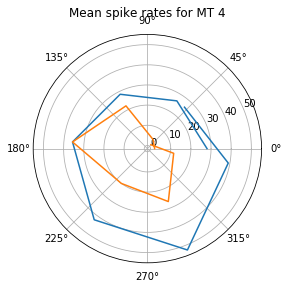

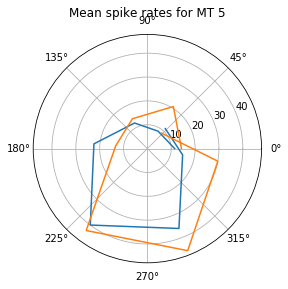

<Figure size 432x288 with 0 Axes>

In [10]:
"""
Nested for loop that goes through each MT cell data.

Nested for loop bins the spike data based on the provided start and end time.
Spike data is averaged out alongside corresponding angle orientation.
"""

finalAngles1 = [[]]*5 #angles data stored for later use, [degrees]
finalSpikeCounts1 = [[]]*5 #spike counts data stored for later use [s]
finalAngles2 = [[]]*5 #angles data stored for later use, [degrees]
finalSpikeCounts2 = [[]]*5 #spike counts data stored for later use [s]

for MTcell, i in zip(["MT 1", "MT 2", "MT 3", "MT 4", "MT 5"],range(5)):
    directions, directionsEnd = [], [] #empty lists to store angle of orientation
    spikeCounts, spikeCountsEnd = [], [] #empty list to store spikes
    
    ecodes_data = pd.DataFrame(df["Col 1"][MTcell]['ecodes'][0][0][0]['data'][0],columns=ecodes_columns)
    startTimes = ecodes_data["dot_on"]*(1/1000) #onset time of motion stimulus, scaled to [s]
    endTimes = ecodes_data["dot_off"]*(1/1000) #offset time of motion stimulus, scaled to [s]
    
    for startTime, endTime, n in zip(startTimes, endTimes, range(len(startTimes))):
        temp = pd.DataFrame(df["Col 1"][MTcell]['spikes'][0][0][n][0],columns=["Spike Times"])*1/1000 #spike times, scaled to [s]

        binz = [startTime,startTime+0.2] #bin starts at onset + 200ms
        binzEnd = [endTime - 0.2, endTime] #bin starts at 200ms before offset time
        
        viewingTime = 0.2 #total viewing time, 200 ms

        a,b = np.histogram(temp['Spike Times'],bins=binz);
        c,d = np.histogram(temp['Spike Times'],bins=binzEnd);
        
        direction = ecodes_data["dot_dir"][n]
        directionEnd = ecodes_data["dot_dir"][n]

        directions.append(direction)
        directionsEnd.append(directionEnd)
        
        spikeCountsEnd.append(c[0]/viewingTime) #spike counts normalized by bin width, viewing time
        spikeCounts.append(a[0]/viewingTime) #spike counts normalized by bin width, viewing time

    countsdf = pd.DataFrame({"Spikes" : spikeCounts, 
                             "Angle" : directions})
    
    countsdfEnd = pd.DataFrame({"Spikes" : spikeCountsEnd, 
                                "Angle" : directionsEnd})

    sorteddata = countsdf.sort_values(by = ["Angle"], ascending = True).groupby("Angle").mean().reset_index() #averaging by angle
    sorteddataEnd = countsdfEnd.sort_values(by = ["Angle"], ascending = True).groupby("Angle").mean().reset_index() #averaging by angle
    
    finalAngles1[i] = sorteddata["Angle"] #storing for later use
    finalSpikeCounts1[i] = sorteddata["Spikes"] #storing for later use
    finalAngles2[i] = sorteddataEnd["Angle"] #storing for later use
    finalSpikeCounts2[i] = sorteddataEnd["Spikes"] #storing for later use
    
    
    plt.polar(sorteddata["Angle"],sorteddata["Spikes"])
    plt.polar(sorteddataEnd["Angle"],sorteddataEnd["Spikes"])
    plt.plot()
    plt.tight_layout()
    plt.title("Mean spike rates for " + MTcell)
    plt.figure();

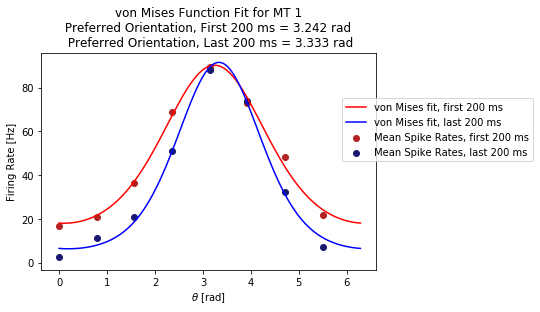

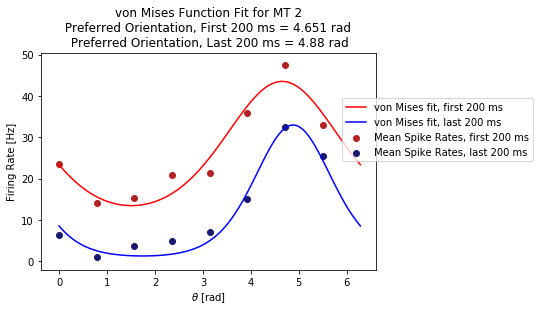

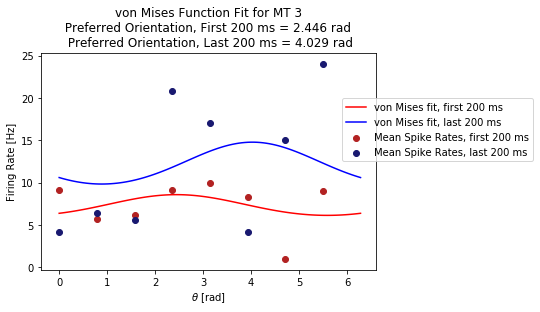

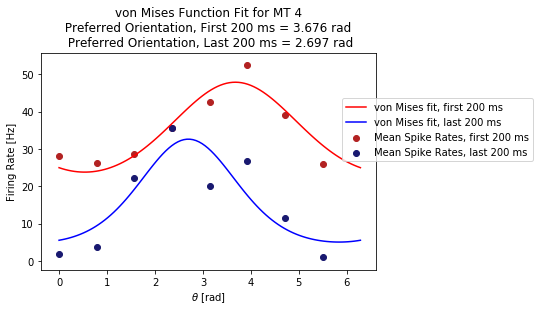

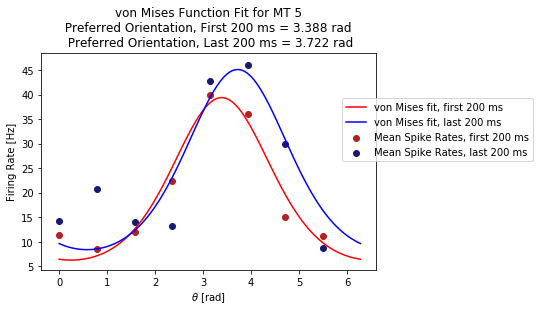

<Figure size 432x288 with 0 Axes>

In [11]:
preferredDir = [] #stores preferred orientation of the cells
phiGuesses = [3, 5, 3, 3, 4] #guesses for preferred angle of orientation

for angles1, sortedspikes1, angles2, sortedspikes2, guess, title in zip(finalAngles1, finalSpikeCounts1, finalAngles2, finalSpikeCounts2, phiGuesses, ["MT 1", "MT 2", "MT 3", "MT 4", "MT 5"]):
    angles1, angles2 = angles1*np.pi/180, angles2*np.pi/180 #converting degrees to rad
    
    params1, params_covariance = optimize.curve_fit(vonMises,angles1,sortedspikes1,p0 = [max(sortedspikes1),guess,20])
    params2, params_covariance2 = optimize.curve_fit(vonMises,angles2,sortedspikes2,p0 = [max(sortedspikes2),guess,20])
    
    thetas = np.linspace(0,2*np.pi,100)
    
    plt.plot(thetas, vonMises(thetas,params1[0],params1[1],params1[2]),label="von Mises fit, first 200 ms", color = "red")
    plt.plot(thetas, vonMises(thetas,params2[0],params2[1],params2[2]),label="von Mises fit, last 200 ms", color = "blue")
    plt.scatter(angles1,sortedspikes1,label="Mean Spike Rates, first 200 ms",color="firebrick")
    plt.scatter(angles2,sortedspikes2,label="Mean Spike Rates, last 200 ms",color="midnightblue")
    plt.xlabel(r"$\theta$ [rad]")
    plt.ylabel("Firing Rate [Hz]")
    plt.title("von Mises Function Fit for " + title + "\n Preferred Orientation, First 200 ms = " + 
              str(round(params1[1],3)) + " rad \n Preferred Orientation, Last 200 ms = " + str(round(params2[1],3)) + " rad")
    plt.legend(loc=(0.9,0.5));
    plt.figure();

Extra credit: The direction tuning of the first 200 ms compared to the last 200 ms looks extremely similar; in fact, the preferred orientations for MT1, MT2, and MT5 are extremely similar. MT3 as a whole just looks rather scattered anyways, and MT4 seems shifted a little differently. However, overall, the direction tuning looks pretty similar. 

## Problem 2: Coherence Dependence

### Part (a): ROC Curves

In [12]:
rocdata = pd.DataFrame(df["Col 2"])

In [13]:
"""
ROC function
"""

def rocN(x,y,N=100):
    # ROC computes area under ROC given distributions x and y, each 1D arrays
    # uses N points to contruct the ROC, default is 100
    # Note: x and y must contain at least 3 values.
    # Function returns nan if insufficient data is supplied.
    
    if len(x) < 3:
        a = float('nan')
        print('Error: not enough trials in x input')
    if len(y) <3:
        a = float('nan')
        print('Error: not enough trials in y input')
    
    zlow = np.minimum(np.min(x),np.min(y))
    zhigh = np.maximum(np.max(x),np.max(y))
    z = np.linspace(zlow,zhigh,N)
    
    fa = np.zeros((N,1)) #false positives
    hit = np.zeros((N,1)) #true positives
    
    for i in range(0,N):
        fa[N-i-1]=np.sum(y>z[i])
        hit[N-i-1]=np.sum(x>z[i])

    ny = np.shape(y)
    fa = fa/ny
    
    nx = np.shape(x)
    hit = hit/nx
    
    fa[0] = 0
    hit[0] = 0
    fa[N-1] = 1
    hit[N-1] = 1
    
    a=np.trapz(hit,fa,axis=0)
    
    return fa,hit,a

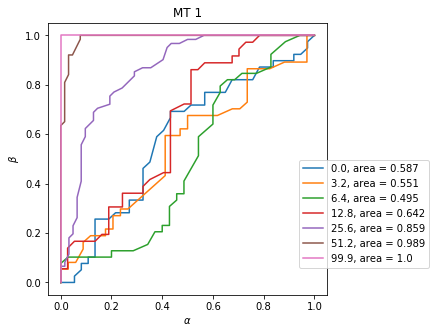

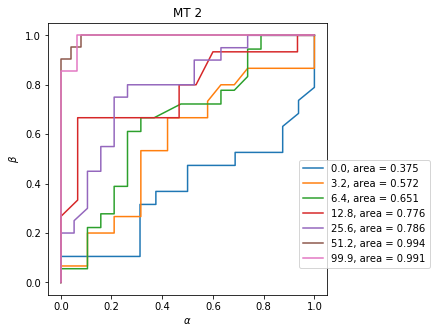

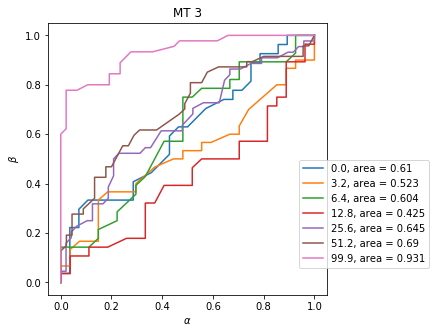

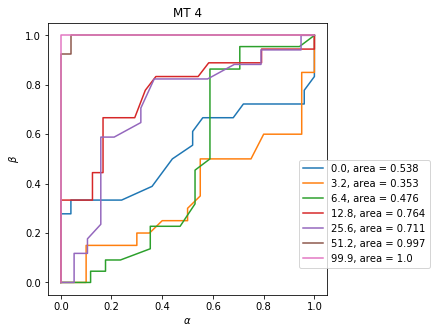

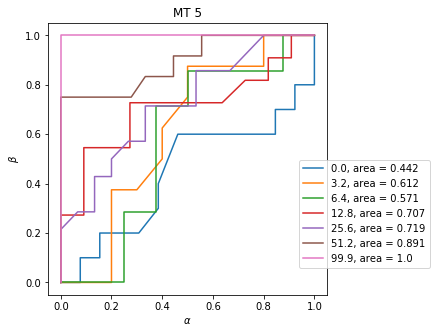

In [22]:
cohs = [0.0, 3.2, 6.4, 12.8, 25.6, 51.2, 99.9] #various coherence values

for MTcell, i in zip(["MT 1", "MT 2", "MT 3", "MT 4", "MT 5"],range(5)):
    directions = [] #empty list to store angle of orientation
    coherences = [] #empty list to store corresponding coherences
    fireCounts = [] #empty list to store firing rates
    
    plt.figure(figsize=(5,5)) #creating empty plot figure
    plt.title(MTcell)
    plt.xlabel(r"$\alpha$")
    plt.ylabel(r"$\beta$")
    
    ecodes_data_ROC = pd.DataFrame(df["Col 2"][MTcell]['ecodes'][0][0][0]['data'][0],columns=ecodes_columns) #data for MT cell x
    
    startTimes = ecodes_data_ROC["dot_on"]*(1/1000) #onset time of motion stimulus, scaled to [s]
    endTimes = ecodes_data_ROC["dot_off"]*(1/1000) #offset time of motion stimulus, scaled to [s]
    directionss = ecodes_data_ROC["dot_dir"] #orientations
    coherencess = ecodes_data_ROC["dot_coh"] #coherences
    
    """
    Find the firing rate for each motion onset
    """
    for startTime, endTime, direction, coherence, j in zip (startTimes, endTimes, directionss, coherencess, range(len(startTimes))):
        temp = pd.DataFrame(rocdata["Col 2"][MTcell]["spikes"][0][0][j][0],columns=["Spike Times"])*1/1000

        binz = [startTime,endTime] #bin comprised of onset and offset times
        viewingTime = endTime-startTime #total viewing time

        a,b = np.histogram(temp['Spike Times'],bins=binz);

        directions.append(direction)
        coherences.append(coherence)
        
        fireCounts.append(a[0]/viewingTime) #spike counts normalized by bin width, viewing time
    
    countsdf = pd.DataFrame({"Firing rate" : fireCounts, #placing in dataframe 
                         "Angle" : directions,
                         "Coherence" : coherences})
    
    """
    Sorting by (i) max and min angles and (ii) coherence
    """
    countsdfmax = pd.DataFrame(countsdf[(countsdf["Angle"] > (max(countsdf["Angle"])-180.0))]).sort_values(by = ["Coherence"], ascending = True).reset_index().drop(columns=["index"])
    countsdfmin = pd.DataFrame(countsdf[(countsdf["Angle"] < max(countsdf["Angle"]))]).sort_values(by = ["Coherence"], ascending = True).reset_index().drop(columns=["index"])
    
    cohlistmin = countsdfmin["Coherence"] #coherences corresponding to opposite orientation
    cohlistmax = countsdfmax["Coherence"] #coherences corresponding to preferred orientation

    frmin = countsdfmin["Firing rate"] #firing rates corresponding to opposite orientation
    frmax = countsdfmax["Firing rate"] #firing rates corresponding to preferred orientation
    
    for coh in cohs: 
        xs = [] #store angle 0s
        ys = [] #store angle 180s
    
        for n, m in zip(range(len(countsdfmin)), range(len(countsdfmax))):
            if cohlistmin[n] == coh:
                xs.append(frmin[n])

            if cohlistmax[m] == coh:
                ys.append(frmax[m])
    
        alpha, beta, area = rocN(ys,xs)
        
        labeler = str(coh) + ", area = " + str(round(area[0],3))
        plt.plot(alpha,beta,label=labeler)
    plt.legend(loc=(0.9,0.1))

### Part (b): Neurometric Function

In [15]:
def weibull(c, p_alpha, p_beta):
    return 1 - 0.5*np.exp(-(c/p_alpha)**p_beta)

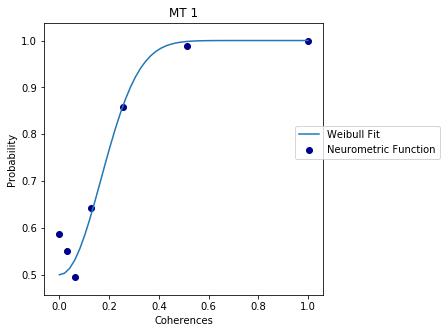

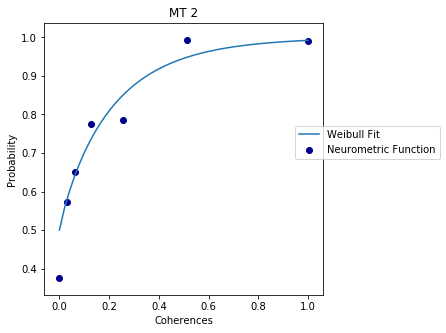

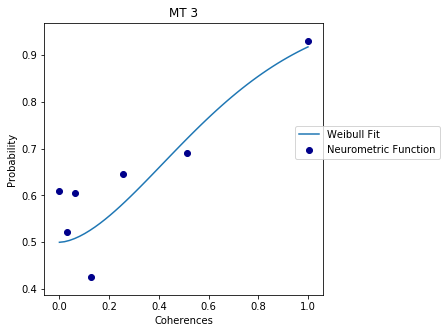

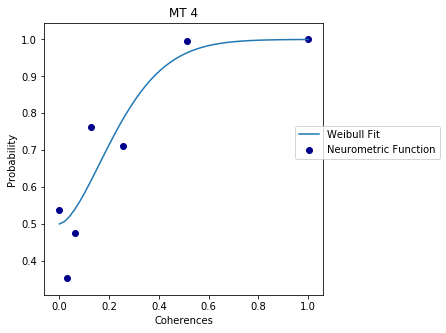

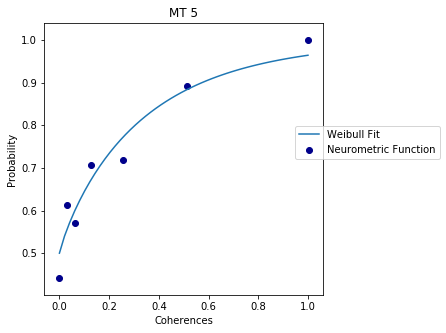

In [25]:
"""
Fitting for MT Cells
"""
alphass, betass, areass= [[]]*7, [[]]*7, [[]]*7

cohs = [0.0, 3.2, 6.4, 12.8, 25.6, 51.2, 99.9] #various coherence values

for MTcell, i in zip(["MT 1", "MT 2", "MT 3", "MT 4", "MT 5"],range(5)):
    directions = [] #empty list to store angle of orientation
    coherences = [] #empty list to store corresponding coherences
    fireCounts = [] #empty list to store firing rates
    
    ecodes_data_ROC = pd.DataFrame(df["Col 2"][MTcell]['ecodes'][0][0][0]['data'][0],columns=ecodes_columns) #data for MT cell x
    
    startTimes = ecodes_data_ROC["dot_on"]*(1/1000) #onset time of motion stimulus, scaled to [s]
    endTimes = ecodes_data_ROC["dot_off"]*(1/1000) #offset time of motion stimulus, scaled to [s]
    directionss = ecodes_data_ROC["dot_dir"] #orientations
    coherencess = ecodes_data_ROC["dot_coh"] #coherences
    
    """
    Find the firing rate for each motion onset
    """
    for startTime, endTime, direction, coherence, j in zip (startTimes, endTimes, directionss, coherencess, range(len(startTimes))):
        temp = pd.DataFrame(rocdata["Col 2"][MTcell]["spikes"][0][0][j][0],columns=["Spike Times"])*1/1000

        binz = [startTime,endTime] #bin comprised of onset and offset times
        viewingTime = endTime-startTime #total viewing time

        a,b = np.histogram(temp['Spike Times'],bins=binz);

        directions.append(direction)
        coherences.append(coherence)
        
        fireCounts.append(a[0]/viewingTime) #spike counts normalized by bin width, viewing time
    
    countsdf = pd.DataFrame({"Firing rate" : fireCounts, #placing in dataframe 
                         "Angle" : directions,
                         "Coherence" : coherences})
    
    """
    Sorting by (i) max and min angles and (ii) coherence
    """
    countsdfmax = pd.DataFrame(countsdf[(countsdf["Angle"] > (max(countsdf["Angle"])-180.0))]).sort_values(by = ["Coherence"], ascending = True).reset_index().drop(columns=["index"])
    countsdfmin = pd.DataFrame(countsdf[(countsdf["Angle"] < max(countsdf["Angle"]))]).sort_values(by = ["Coherence"], ascending = True).reset_index().drop(columns=["index"])
    
    cohlistmin = countsdfmin["Coherence"] #coherences corresponding to opposite orientation
    cohlistmax = countsdfmax["Coherence"] #coherences corresponding to preferred orientation

    frmin = countsdfmin["Firing rate"] #firing rates corresponding to opposite orientation
    frmax = countsdfmax["Firing rate"] #firing rates corresponding to preferred orientation
    
    for coh, k in zip(cohs, range(len(cohs))): 
        xs = [] #store angle 0s
        ys = [] #store angle 180s
    
        for n, m in zip(range(len(countsdfmin)), range(len(countsdfmax))):
            if cohlistmin[n] == coh:
                xs.append(frmin[n])
                
            if cohlistmax[m] == coh:
                ys.append(frmax[m])
    
        alpha, beta, area = rocN(ys,xs) #do roc
        
        alphass[k] = alpha #saving alphas array for later use
        betass[k] = beta #saving betas array for later use
        areass[k] = area[0] #saving areas for later use
        
    plt.figure(figsize=(5,5))
    params_ROC, params_covariance_ROC = optimize.curve_fit(weibull,list(map(lambda x: x/100, cohs)),areass,p0 = [0.3,0.5]) #fitting
    
    points = np.linspace(0,1,50)
    plt.xlabel("Coherences")
    plt.ylabel("Probability")
    
    plt.title(MTcell)
    plt.scatter(list(map(lambda x: x/100, cohs)),areass,label="Neurometric Function",color="darkblue")
    plt.plot(points,weibull(points,params_ROC[0],params_ROC[1]),label="Weibull Fit")
    plt.legend(loc=(0.9,0.5))

### Part (c): Behavorial data

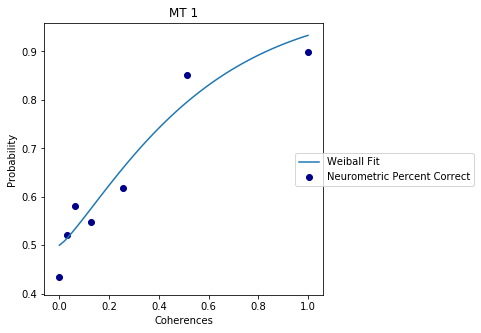

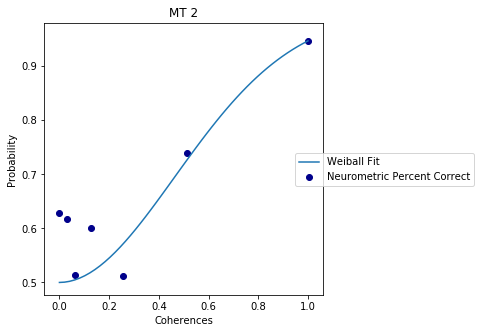

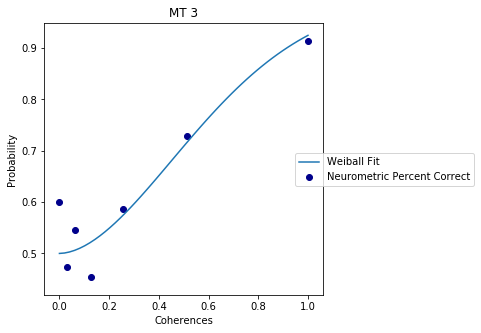

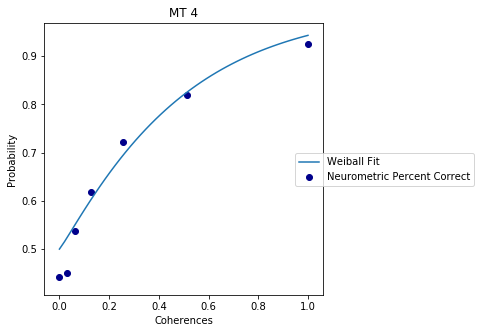

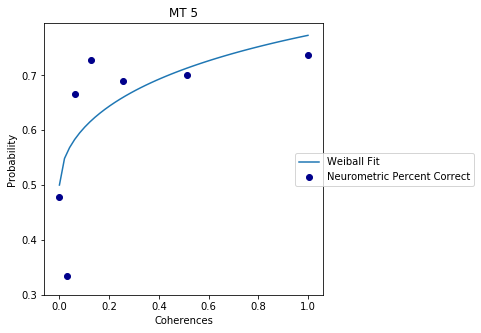

In [26]:
"""
Fitting for MT cells, probability correct
"""
alphass, betass, areass= [[]]*7, [[]]*7, [[]]*7

cohs = [0.0, 3.2, 6.4, 12.8, 25.6, 51.2, 99.9] #various coherence values

for MTcell, i in zip(["MT 1", "MT 2", "MT 3", "MT 4", "MT 5"],range(5)):
    directions = [] #empty list to store angle of orientation
    coherences = [] #empty list to store corresponding coherences
    fireCounts = [] #empty list to store firing rates
    corrects = [] 
    correctProbability = [] #empty list to store corrects
    
    ecodes_data_ROC = pd.DataFrame(df["Col 2"][MTcell]['ecodes'][0][0][0]['data'][0],columns=ecodes_columns) #data for MT cell x
    
    startTimes = ecodes_data_ROC["dot_on"]*(1/1000) #onset time of motion stimulus, scaled to [s]
    endTimes = ecodes_data_ROC["dot_off"]*(1/1000) #offset time of motion stimulus, scaled to [s]
    directionss = ecodes_data_ROC["dot_dir"] #orientations
    coherencess = ecodes_data_ROC["dot_coh"] #coherences
    
    correctss = ecodes_data_ROC["correct"] #correct
    
    """
    Find the firing rate for each motion onset
    """
    for startTime, endTime, direction, coherence, correct, j in zip(startTimes, endTimes, directionss, coherencess, correctss, range(len(startTimes))):
        temp = pd.DataFrame(rocdata["Col 2"][MTcell]["spikes"][0][0][j][0],columns=["Spike Times"])*1/1000

        binz = [startTime,endTime] #bin comprised of onset and offset times
        viewingTime = endTime-startTime #total viewing time

        a,b = np.histogram(temp['Spike Times'],bins=binz);

        directions.append(direction)
        coherences.append(coherence)
        corrects.append(correct)
        
        fireCounts.append(a[0]/viewingTime) #spike counts normalized by bin width, viewing time
    
    countsdf = pd.DataFrame({"Firing rate" : fireCounts, #placing in dataframe 
                             "Angle" : directions,
                             "Coherence" : coherences,
                             "Correct" : corrects})
    
    """
    Sorting by (i) max and min angles and (ii) coherence
    """
    countsdfmax = pd.DataFrame(countsdf[(countsdf["Angle"] > (max(countsdf["Angle"])-180.0))]).sort_values(by = ["Coherence"], ascending = True).reset_index().drop(columns=["index"])
    countsdfmin = pd.DataFrame(countsdf[(countsdf["Angle"] < max(countsdf["Angle"]))]).sort_values(by = ["Coherence"], ascending = True).reset_index().drop(columns=["index"])
    
    cohlistmin = pd.DataFrame({"Coherence": countsdfmin["Coherence"],
                               "Correct" : countsdfmin["Correct"]})#coherences corresponding to opposite orientation
    cohlistmax = pd.DataFrame({"Coherence": countsdfmax["Coherence"],
                               "Correct" : countsdfmax["Correct"]})#coherences corresponding to preferred orientation

    frmin = countsdfmin["Firing rate"] #firing rates corresponding to opposite orientation
    frmax = countsdfmax["Firing rate"] #firing rates corresponding to preferred orientation
    
    for coh, k in zip(cohs, range(len(cohs))): 
        xs = [] #store angle 0s
        ys = [] #store angle 180s
        tempprob = 0;
        instances = 0;
        
        for n, m in zip(range(len(countsdfmin)), range(len(countsdfmax))):
            if cohlistmin["Coherence"][n] == coh: #check for coherence hits
                xs.append(frmin[n])
                instances += 1; #add to trials
                if cohlistmin["Correct"][n] == 1.0: #check if coherence hit is correct
                    tempprob += 1; #if correct, add 1 to correct hits
                
            if cohlistmax["Coherence"][m] == coh: #check for coherence hits
                ys.append(frmax[m])
                instances += 1; #add to trials
                if cohlistmax["Correct"][m] == 1.0: #check if coherence hit is correct
                    tempprob += 1; #if correct, add 1 to correct hits
                    
        probability = tempprob/instances #find probability for specific coherence
        correctProbability.append(probability)
        
        alpha, beta, area = rocN(ys,xs) #do roc
        
        alphass[k] = alpha #saving alphas array for later use
        betass[k] = beta #saving betas array for later use
        areass[k] = area[0] #saving areas for later use
    
    plt.figure(figsize=(5,5))
    params_ROC, params_covariance_ROC = optimize.curve_fit(weibull,list(map(lambda x: x/100, cohs)),correctProbability) #fitting
    
    points = np.linspace(0,1,50)
    plt.xlabel("Coherences")
    plt.ylabel("Probability")
    
    plt.title(MTcell)
    plt.scatter(list(map(lambda x: x/100, cohs)),correctProbability, label = "Neurometric Percent Correct",color="darkblue")
    plt.plot(points,weibull(points,params_ROC[0],params_ROC[1]), label = "Weiball Fit")
    plt.legend(loc=(0.9,0.4))

### Part (d): Extra credit

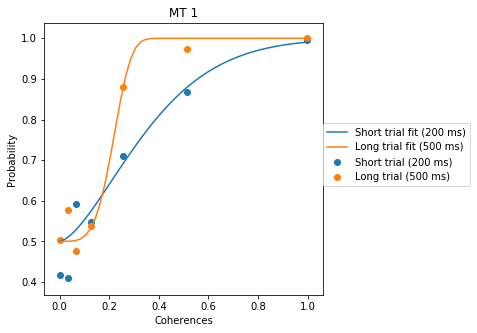

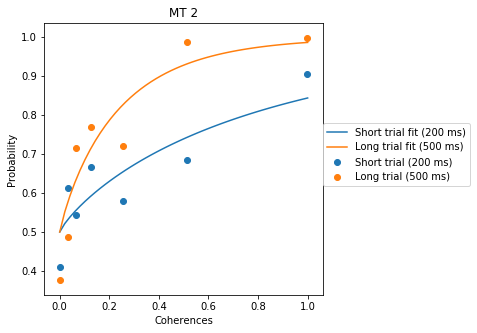

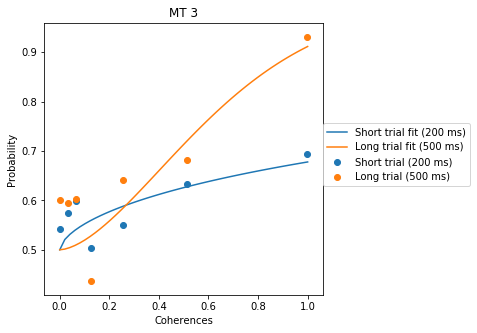

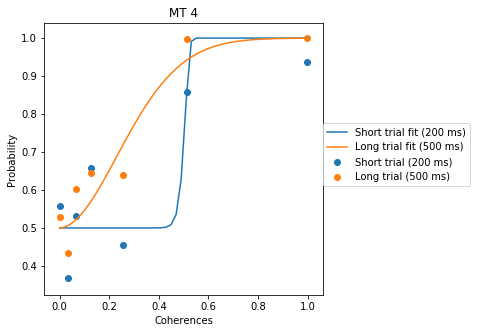

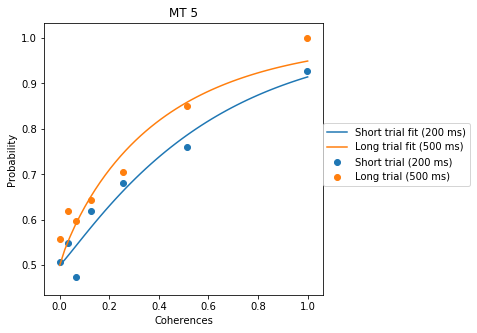

In [18]:
"""
Fitting for MT Cells, short duration, long duration

I defined short duration as the first 200 ms and long duration as 500 ms
"""

alphass, betass, areass, alphass2, betass2, areass2 = [[]]*7, [[]]*7, [[]]*7, [[]]*7, [[]]*7, [[]]*7

cohs = [0.0, 3.2, 6.4, 12.8, 25.6, 51.2, 99.9] #various coherence values

for MTcell, i in zip(["MT 1", "MT 2", "MT 3", "MT 4", "MT 5"],range(5)):
    directions, directions2 = [], [] #empty list to store angle of orientation
    coherences, coherences2 = [], [] #empty list to store corresponding coherences
    fireCounts, fireCounts2 = [], [] #empty list to store firing rates
    
    ecodes_data_ROC = pd.DataFrame(df["Col 2"][MTcell]['ecodes'][0][0][0]['data'][0],columns=ecodes_columns) #data for MT cell x
    
    startTimes = ecodes_data_ROC["dot_on"]*(1/1000) #onset time of motion stimulus, scaled to [s]
    endTimes = ecodes_data_ROC["dot_off"]*(1/1000) #offset time of motion stimulus, scaled to [s]
    
    directionss = ecodes_data_ROC["dot_dir"] #orientations
    coherencess = ecodes_data_ROC["dot_coh"] #coherences
    
    """
    Find the firing rate for each motion onset
    """
    for startTime, endTime, direction, coherence, j in zip (startTimes, endTimes, directionss, coherencess, range(len(startTimes))):
        temp = pd.DataFrame(rocdata["Col 2"][MTcell]["spikes"][0][0][j][0],columns=["Spike Times"])*1/1000

        binz = [startTime,startTime+0.2] #bin comprised of onset + 0.2s for short trial 
        binz2 = [startTime,startTime+0.5] #bin comprised of onset + 0.5s for long trial
        viewingTime, viewingTime2 =  0.2, 0.5#total viewing time

        a,b = np.histogram(temp['Spike Times'],bins=binz); #short trial
        c,d = np.histogram(temp['Spike Times'],bins=binz2); #long trial

        directions.append(direction)
        coherences.append(coherence)
        
        fireCounts.append(a[0]/viewingTime) #spike counts normalized by bin width, viewing time
        fireCounts2.append(c[0]/viewingTime2) #long trial normalization
    
    countsdf = pd.DataFrame({"Firing rate" : fireCounts, #placing in dataframe 
                         "Angle" : directions,
                         "Coherence" : coherences})
    
    countsdf2 = pd.DataFrame({"Firing rate" : fireCounts2, #placing in dataframe 
                         "Angle" : directions,
                         "Coherence" : coherences})
    
    """
    Sorting by (i) max and min angles and (ii) coherence
    """
    countsdfmax = pd.DataFrame(countsdf[(countsdf["Angle"] > (max(countsdf["Angle"])-180.0))]).sort_values(by = ["Coherence"], ascending = True).reset_index().drop(columns=["index"])
    countsdfmin = pd.DataFrame(countsdf[(countsdf["Angle"] < max(countsdf["Angle"]))]).sort_values(by = ["Coherence"], ascending = True).reset_index().drop(columns=["index"])
    countsdfmax2 = pd.DataFrame(countsdf2[(countsdf2["Angle"] > (max(countsdf2["Angle"])-180.0))]).sort_values(by = ["Coherence"], ascending = True).reset_index().drop(columns=["index"])
    countsdfmin2 = pd.DataFrame(countsdf2[(countsdf2["Angle"] < max(countsdf2["Angle"]))]).sort_values(by = ["Coherence"], ascending = True).reset_index().drop(columns=["index"])
    
    cohlistmin = countsdfmin["Coherence"] #coherences corresponding to opposite orientation
    cohlistmax = countsdfmax["Coherence"] #coherences corresponding to preferred orientation
    cohlistmin2 = countsdfmin2["Coherence"] #coherences corresponding to opposite orientation
    cohlistmax2 = countsdfmax2["Coherence"] #coherences corresponding to preferred orientation    

    frmin = countsdfmin["Firing rate"] #firing rates corresponding to opposite orientation
    frmax = countsdfmax["Firing rate"] #firing rates corresponding to preferred orientation
    frmin2 = countsdfmin2["Firing rate"] #firing rates corresponding to opposite orientation
    frmax2 = countsdfmax2["Firing rate"] #firing rates corresponding to preferred orientation
    
    for coh, k in zip(cohs, range(len(cohs))): 
        xs, xs2 = [], [] #store angle 0s
        ys, ys2 = [], [] #store angle 180s
    
        for n, m, o, p in zip(range(len(countsdfmin)), range(len(countsdfmax)), range(len(countsdfmin2)), range(len(countsdfmax2))):
            if cohlistmin[n] == coh:
                xs.append(frmin[n])
                
            if cohlistmax[m] == coh:
                ys.append(frmax[m])
                
            if cohlistmin[o] == coh:
                xs2.append(frmin2[n])
                
            if cohlistmax[p] == coh:
                ys2.append(frmax2[p])
    
        alpha, beta, area = rocN(ys,xs) #do roc
        alpha2, beta2, area2 = rocN(ys2,xs2) #do roc
        
        alphass[k], alphass2[k] = alpha, alpha2 #saving alphas array for later use
        betass[k], betass2[k] = beta, beta2 #saving betas array for later use
        areass[k], areass2[k] = area[0], area2[0] #saving areas for later use
        
    plt.figure(figsize=(5,5))
    
    params_ROC, params_covariance_ROC = optimize.curve_fit(weibull,list(map(lambda x: x/100, cohs)),areass,p0 = [0.3,0.5]) #fitting
    params_ROC2, params_covariance_ROC2 = optimize.curve_fit(weibull,list(map(lambda x: x/100, cohs)),areass2,p0 = [0.1,0.3]) #fitting
    
    points = np.linspace(0,1,50)
    plt.xlabel("Coherences")
    plt.ylabel("Probability")
    
    plt.title(MTcell)
    plt.scatter(list(map(lambda x: x/100, cohs)),areass, label = "Short trial (200 ms)")
    plt.scatter(list(map(lambda x: x/100, cohs)),areass2, label = "Long trial (500 ms)")
    plt.plot(points,weibull(points,params_ROC[0],params_ROC[1]),label = "Short trial fit (200 ms)")
    plt.plot(points,weibull(points,params_ROC2[0],params_ROC2[1]),label = "Long trial fit (500 ms)")
    
    plt.legend(loc=(1,0.4))

Short window: 200 ms
Long window: 500 ms

It seems like for longer trials the monkey gets a higher probability of getting its trials correct. For each coherence in each cell, the fits for the long trial are all a little bit above that of the short fit. 